# GRIP: The Sparks Foundation

## Data Science and Business Analytics Intern
## Author: Aastha Shah

# Task 1 : Prediction using Supervised ML

### In this task we have to predict the percentage score of a student based on number of hours studied. The task has two variables where the feature is the number of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Reading data from URL

In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

print(data)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
#To find number of rows and columns.
data.shape

(25, 2)

In [4]:
#To find more information about our dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Clearly there is positive linear relationship between number of hours studied and scores obtained.

### Data Visualization

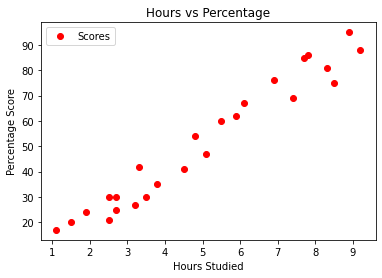

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', color="red")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training the algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Visualizing the model

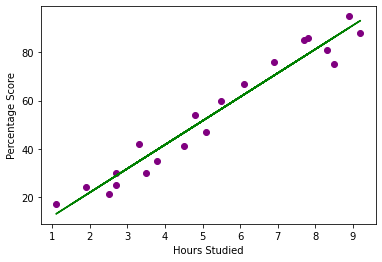

In [9]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, color="purple")
plt.plot(X, line,color="green");
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
#To retrieve the intercept and coefficient

print("Intercept is :")
print(reg.intercept_)

print("\nCoefficient is :")
print(reg.coef_)

Intercept is :
2.0181600414346974

Coefficient is :
[9.91065648]


### Making Predictions

In [11]:
print(X_test)
y_pred = reg.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual vs Predicted

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


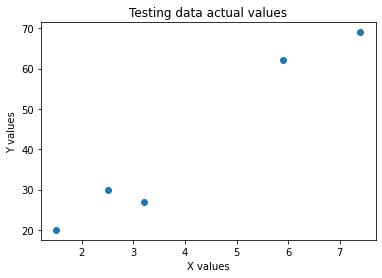

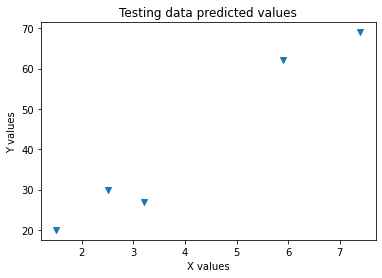

In [13]:
# Now lets visualize the predicted and actual values

plt.scatter(X_test,y_test)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Testing data actual values')
plt.show()

plt.scatter(X_test,y_test,marker='v')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Testing data predicted values')
plt.show()

In [14]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict([[hours]])

print("The Predicted Score is",own_pred[0], "if a person studies for", hours , "hours")

The Predicted Score is 93.69173248737535 if a person studies for 9.25 hours


### Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 2.0454485813637495
